In [1]:
#pip install tensorflow numpy

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [4]:
base_dir = r'C:\Users\firoj\OneDrive\Desktop\thesis_test\Thesis_test_01\Feature_matrix\AIS_Weather_Lock\\'
os.chdir(base_dir)

In [5]:
# Load the datasets
X_train = np.load(base_dir + 'X_train.npy')
X_val = np.load(base_dir + 'X_val.npy')
X_test = np.load(base_dir + 'X_test.npy')

y_train = np.load(base_dir + 'y_train.npy')
y_val = np.load(base_dir + 'y_val.npy')
y_test = np.load(base_dir + 'y_test.npy')

In [6]:
# Reshape X_train to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("New shape of X_train:", X_train.shape)

New shape of X_train: (34654, 1, 11)


In [7]:
# Define RMSE as a custom metric
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [8]:
input_shape = (X_train.shape[1], X_train.shape[2]) # timesteps, features

# Model architecture with L1 Regularization
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(input_shape), kernel_regularizer=l1(0.01)), # Adjust your input_shape
    Dropout(0.2),
    LSTM(50, kernel_regularizer=l1(0.01)),
    Dropout(0.2),
    Dense(1)
])

In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.005651796781587945), 
              loss='mean_squared_error', 
              metrics=['mse', rmse, 'mae', 'mape'])

In [10]:
#Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             12400     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 32651 (127.54 KB)
Trainable params: 32651 (127.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Fit the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stopping])

Epoch 1/100
1083/1083 [==============================] - 7s 4ms/step - loss: 251067.9062 - mse: 251036.5469 - rmse: 490.0019 - mae: 283.7865 - mape: 2248285440.0000 - val_loss: 202342.8281 - val_mse: 202302.2031 - val_rmse: 438.9442 - val_mae: 250.6613 - val_mape: 2451675648.0000
Epoch 2/100
1083/1083 [==============================] - 3s 3ms/step - loss: 173507.0469 - mse: 173457.3594 - rmse: 406.1802 - mae: 231.1615 - mape: 2130796032.0000 - val_loss: 144122.5781 - val_mse: 144067.0625 - val_rmse: 369.8099 - val_mae: 209.7155 - val_mape: 2088252288.0000
Epoch 3/100
1083/1083 [==============================] - 3s 3ms/step - loss: 130567.0469 - mse: 130508.0234 - rmse: 352.4492 - mae: 204.0854 - mape: 1998134912.0000 - val_loss: 112670.1328 - val_mse: 112607.7812 - val_rmse: 327.3405 - val_mae: 192.5250 - val_mape: 1921479040.0000
Epoch 4/100
1083/1083 [==============================] - 3s 3ms/step - loss: 107407.7188 - mse: 107341.9609 - rmse: 320.0314 - mae: 189.3609 - mape: 19599617

1083/1083 [==============================] - 3s 3ms/step - loss: 41607.3320 - mse: 41482.4297 - rmse: 197.2552 - mae: 116.5107 - mape: 1838908288.0000 - val_loss: 31631.5332 - val_mse: 31506.0000 - val_rmse: 169.9626 - val_mae: 98.8049 - val_mape: 2069700608.0000
Epoch 31/100
1083/1083 [==============================] - 3s 3ms/step - loss: 41094.1680 - mse: 40968.0352 - rmse: 195.5762 - mae: 115.4762 - mape: 1855012352.0000 - val_loss: 30959.2305 - val_mse: 30832.4629 - val_rmse: 168.3066 - val_mae: 98.6718 - val_mape: 1953593984.0000
Epoch 32/100
1083/1083 [==============================] - 3s 3ms/step - loss: 41010.1172 - mse: 40882.7227 - rmse: 195.8387 - mae: 116.0589 - mape: 1887914624.0000 - val_loss: 30257.0820 - val_mse: 30129.0449 - val_rmse: 165.7794 - val_mae: 96.4826 - val_mape: 1680084608.0000
Epoch 33/100
1083/1083 [==============================] - 3s 3ms/step - loss: 40341.9414 - mse: 40213.2969 - rmse: 193.9590 - mae: 114.3584 - mape: 1816862976.0000 - val_loss: 29357.

Epoch 60/100
1083/1083 [==============================] - 3s 3ms/step - loss: 34199.1914 - mse: 34043.3047 - rmse: 177.9205 - mae: 105.6231 - mape: 1733762560.0000 - val_loss: 23709.5723 - val_mse: 23553.1895 - val_rmse: 146.1562 - val_mae: 85.7034 - val_mape: 1661908224.0000
Epoch 61/100
1083/1083 [==============================] - 3s 3ms/step - loss: 34185.0117 - mse: 34028.2969 - rmse: 178.0101 - mae: 106.2062 - mape: 1697862528.0000 - val_loss: 23512.4648 - val_mse: 23355.3066 - val_rmse: 146.0920 - val_mae: 86.1294 - val_mape: 1791426176.0000
Epoch 62/100
1083/1083 [==============================] - 4s 3ms/step - loss: 34190.1211 - mse: 34032.5117 - rmse: 177.9688 - mae: 106.4549 - mape: 1721767168.0000 - val_loss: 22826.5156 - val_mse: 22668.5176 - val_rmse: 143.5093 - val_mae: 84.0070 - val_mape: 1675371136.0000
Epoch 63/100
1083/1083 [==============================] - 3s 3ms/step - loss: 34100.9141 - mse: 33942.4883 - rmse: 177.1897 - mae: 105.9856 - mape: 1767359104.0000 - val

Epoch 90/100
1083/1083 [==============================] - 2s 2ms/step - loss: 31564.7793 - mse: 31386.4316 - rmse: 170.7689 - mae: 102.2624 - mape: 1686129920.0000 - val_loss: 21391.8418 - val_mse: 21213.1328 - val_rmse: 138.7594 - val_mae: 80.7631 - val_mape: 1516369152.0000
Epoch 91/100
1083/1083 [==============================] - 2s 2ms/step - loss: 31669.7344 - mse: 31490.7109 - rmse: 171.1881 - mae: 103.0537 - mape: 1835934080.0000 - val_loss: 20951.0527 - val_mse: 20771.6777 - val_rmse: 137.0322 - val_mae: 80.3211 - val_mape: 1614686592.0000
Epoch 92/100
1083/1083 [==============================] - 3s 2ms/step - loss: 31105.5410 - mse: 30925.8398 - rmse: 169.3713 - mae: 101.6938 - mape: 1716268928.0000 - val_loss: 20659.3145 - val_mse: 20479.2500 - val_rmse: 136.3497 - val_mae: 79.8556 - val_mape: 1641080320.0000
Epoch 93/100
1083/1083 [==============================] - 2s 2ms/step - loss: 31430.9062 - mse: 31250.5273 - rmse: 170.0976 - mae: 101.8388 - mape: 1744110080.0000 - val

In [13]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

233/233 [==============================] - 0s 1ms/step - loss: 22667.3203 - mse: 22487.2539 - rmse: 141.8285 - mae: 81.1238 - mape: 1510327808.0000
Test Loss: [22667.3203125, 22487.25390625, 141.8284912109375, 81.12382507324219, 1510327808.0]


### Loss Curve

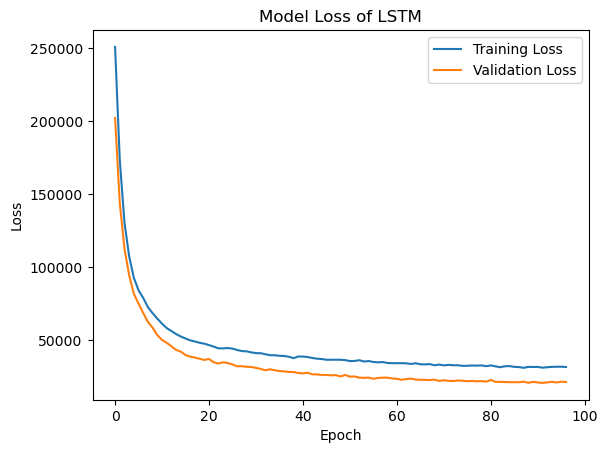

In [14]:
# Assuming history is the output of the model.fit() method
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss of LSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [15]:
y_pred = model.predict(X_test).flatten()  # Flatten predictions to ensure it's a 1D array
y_test_flattened = y_test.flatten()  # Flatten actual values for consistency

233/233 [==============================] - 1s 940us/step


### Actual vs Predicted Values

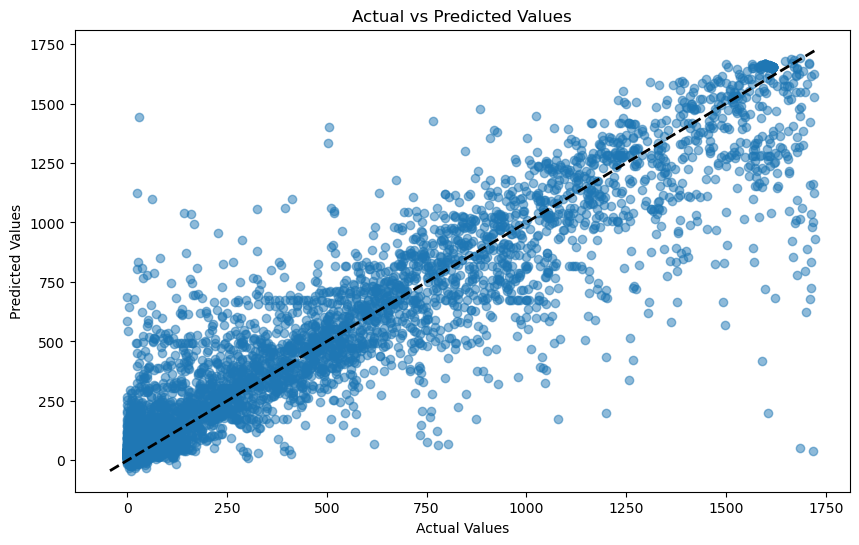

In [16]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_flattened, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Plot a line of perfect predictions for reference
max_val = max(y_test_flattened.max(), y_pred.max())
min_val = min(y_test_flattened.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)  # Black dashed line for perfect predictions

plt.show()

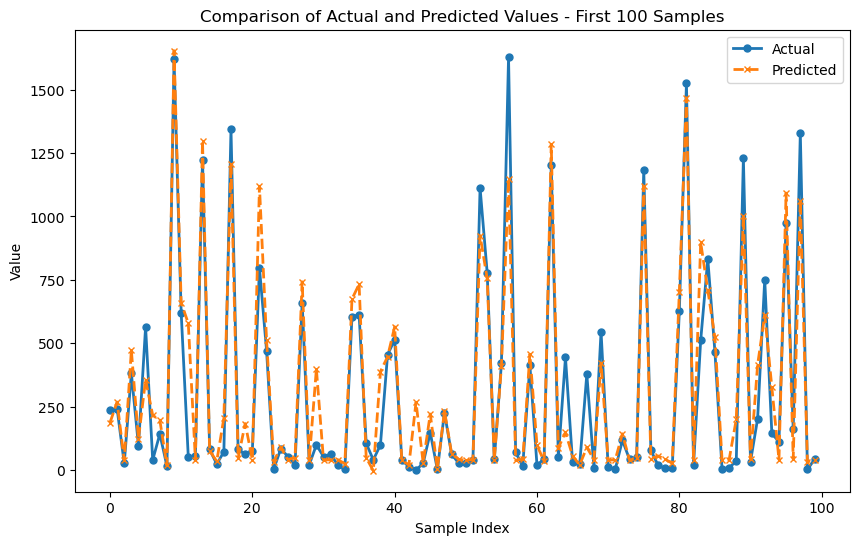

In [17]:
# Plotting a line plot for a clearer comparison for a subset
plt.figure(figsize=(10, 6))
plt.plot(y_test_flattened[:100], marker='o', label='Actual', linewidth=2, markersize=5)
plt.plot(y_pred[:100], marker='x', linestyle='--', label='Predicted', linewidth=2, markersize=5)
plt.title('Comparison of Actual and Predicted Values - First 100 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

### Error Distribution

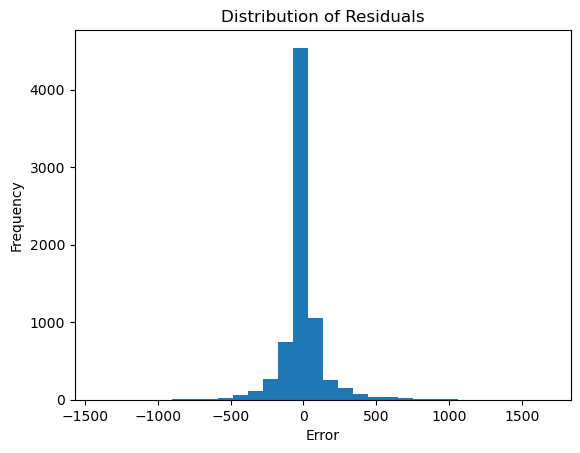

In [18]:
# Calculating residuals
residuals = y_test - y_pred.squeeze()  # Adjust dimensions if necessary

# Plotting the histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [19]:
# Evaluate the model
loss, mse, rmse, mae, mape = model.evaluate(X_test, y_test)
print("Test loss (MSE):", loss)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

233/233 [==============================] - 0s 1ms/step - loss: 22667.3203 - mse: 22487.2539 - rmse: 141.8285 - mae: 81.1238 - mape: 1510327808.0000
Test loss (MSE): 22667.3203125
Mean Squared Error (MSE): 22487.25390625
Root Mean Squared Error (RMSE): 141.8284912109375
Mean Absolute Error (MAE): 81.12382507324219
Mean Absolute Percentage Error (MAPE): 1510327808.0


# Hyperparameter Tuning

In [20]:
#pip install keras_tuner

In [21]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [22]:
def build_model(hp):
    model = Sequential()
    model.add(Bidirectional(
        LSTM(
            units=hp.Int('units', min_value=30, max_value=100, step=10), 
            activation='relu'), 
        input_shape=input_shape))
    model.add(Dense(1))
    
    # Hyperparameters for the optimizer
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mean_squared_error',
        metrics=['mse', 'mae', 'mape']
    )

    return model

In [23]:
# Set up the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_mse',  # Change to 'val_loss' if you want to minimize loss
    max_trials=10,        # Number of variations to try
    executions_per_trial=3, # Number of models to train for each trial
    directory='my_dir',    # Directory where the results are saved
    project_name='bidirectional_lstm'
)

Reloading Tuner from my_dir\bidirectional_lstm\tuner0.json


In [24]:
# Start search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

In [25]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best LSTM Units: {best_hps.get('units')}")
print(f"Best Learning Rate: {best_hps.get('learning_rate')}")

Best LSTM Units: 70
Best Learning Rate: 0.005651796781587945


In [26]:
tuner.results_summary()

Results summary
Results in my_dir\bidirectional_lstm
Showing 10 best trials
Objective(name="val_mse", direction="min")

Trial 06 summary
Hyperparameters:
units: 70
learning_rate: 0.005651796781587945
Score: 135375.203125

Trial 09 summary
Hyperparameters:
units: 60
learning_rate: 0.004787239377037189
Score: 141863.30208333334

Trial 01 summary
Hyperparameters:
units: 40
learning_rate: 0.002907991515463253
Score: 168172.28645833334

Trial 07 summary
Hyperparameters:
units: 80
learning_rate: 0.0019507512756198107
Score: 181137.94270833334

Trial 04 summary
Hyperparameters:
units: 70
learning_rate: 0.0010378300088896486
Score: 210925.08333333334

Trial 03 summary
Hyperparameters:
units: 70
learning_rate: 0.0006538446881599171
Score: 229525.06770833334

Trial 02 summary
Hyperparameters:
units: 70
learning_rate: 0.000389768725698735
Score: 245199.81770833334

Trial 05 summary
Hyperparameters:
units: 70
learning_rate: 0.00025984235234273364
Score: 258179.22916666666

Trial 00 summary
Hyperpa

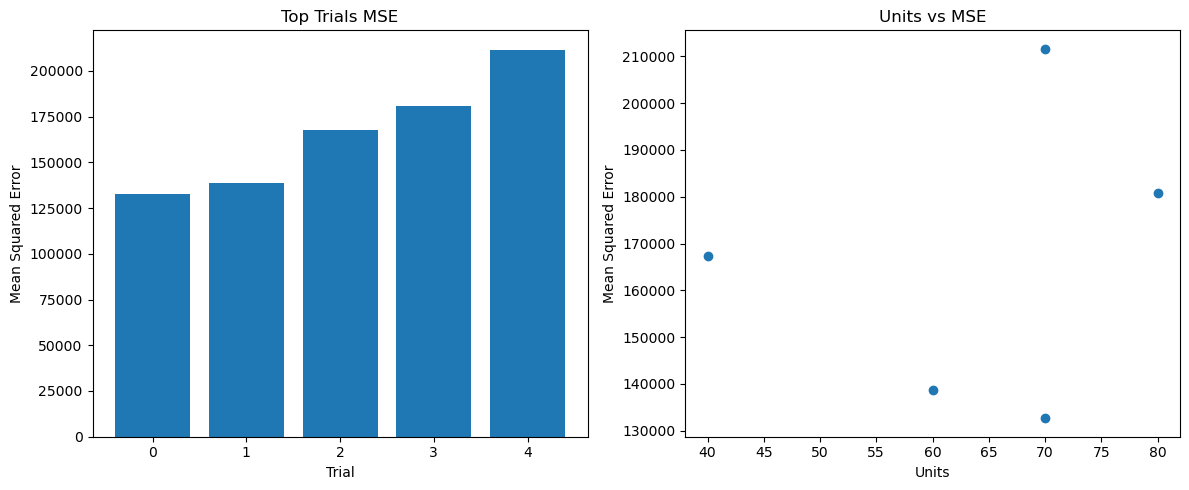

In [27]:
# Get all completed trials as a DataFrame
results_df = tuner.oracle.get_best_trials(num_trials=5)

# Initialize the plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plotting MSE for the top trials
ax[0].set_title('Top Trials MSE')
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_xlabel('Trial')
ax[0].bar(range(len(results_df)), [trial.metrics.get_best_value('mse') for trial in results_df])

# Plotting hyperparameters (e.g., units) vs MSE
ax[1].set_title('Units vs MSE')
ax[1].set_ylabel('Mean Squared Error')
ax[1].set_xlabel('Units')
ax[1].scatter([trial.hyperparameters.values['units'] for trial in results_df], 
              [trial.metrics.get_best_value('mse') for trial in results_df])

plt.tight_layout()
plt.show()